In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 

from matplotlib import style

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

## Anscombe's quartet

https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

As statistics "reduce" information which exists in the initial sample it's important to remember that the same statistics can be obtained from absolutely different samples

In [34]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [35]:

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

df = pd.DataFrame([x, y1, y2, y3, x4, y4], index=['x', 'y1', 'y2', 'y3', 'x4', 'y4']).T

df

,x,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


In [36]:
df.corr()

,x,y1,y2,y3,x4,y4
x,1.000000,0.816421,0.816237,0.816287,-0.500000,-0.314047
y1,0.816421,1.000000,0.750005,0.468717,-0.529093,-0.489116
y2,0.816237,0.750005,1.000000,0.587919,-0.718437,-0.478095
y3,0.816287,0.468717,0.587919,1.000000,-0.344661,-0.155472
x4,-0.500000,-0.529093,-0.718437,-0.344661,1.000000,0.816521
y4,-0.314047,-0.489116,-0.478095,-0.155472,0.816521,1.000000


In [37]:
pairs = [('x', 'y1'), ('x', 'y2'), ('x', 'y3'), ('x4', 'y4')]

stats = pd.DataFrame([
    [df[x].mean(), df[x].std(), df[y].mean(), df[y].std(), df[x].corr(df[y])]
    for x, y in pairs
], columns=['Mean_X', 'Std_X', 'Mean_Y', 'Std_Y', 'Corr'], index=['I', 'II', 'III', 'IV'])

stats.round(2)

,Mean_X,Std_X,Mean_Y,Std_Y,Corr
I,9.0,3.32,7.5,2.03,0.82
II,9.0,3.32,7.5,2.03,0.82
III,9.0,3.32,7.5,2.03,0.82
IV,9.0,3.32,7.5,2.03,0.82


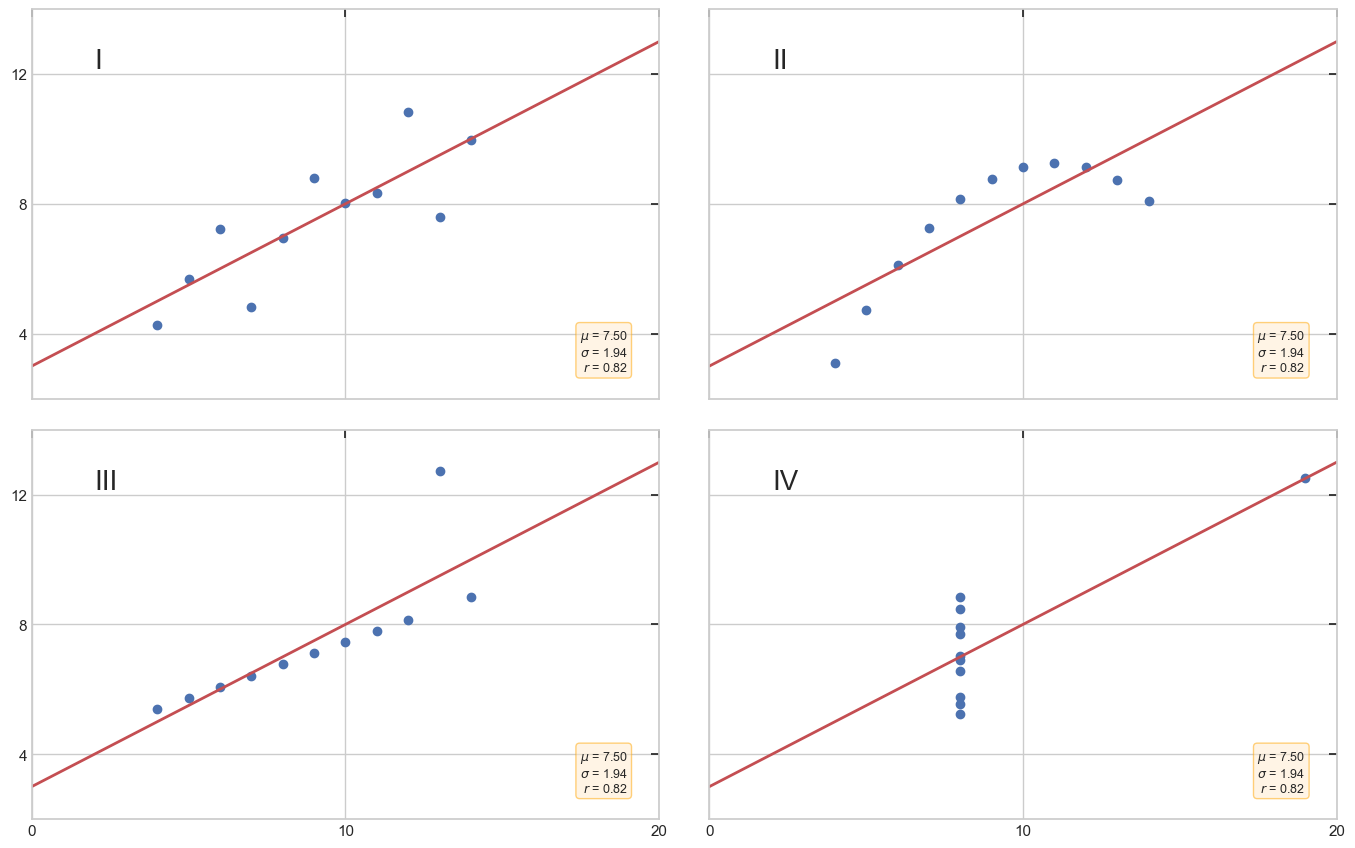

In [73]:

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

## Datasaurus dozen


In [45]:
data = pd.read_csv('DatasaurusDozen.tsv', sep='\t')
data.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [47]:
datasets_grouped = data.groupby('dataset')
datasets_grouped.agg(['count', 'mean', 'var', 'std']).round(2)

x                           y                      
           count   mean     var    std count   mean     var    std
dataset                                                           
away         142  54.27  281.23  16.77   142  47.83  725.75  26.94
bullseye     142  54.27  281.21  16.77   142  47.83  725.53  26.94
circle       142  54.27  280.90  16.76   142  47.84  725.23  26.93
dino         142  54.26  281.07  16.77   142  47.83  725.52  26.94
dots         142  54.26  281.16  16.77   142  47.84  725.24  26.93
h_lines      142  54.26  281.10  16.77   142  47.83  725.76  26.94
high_lines   142  54.27  281.12  16.77   142  47.84  725.76  26.94
slant_down   142  54.27  281.12  16.77   142  47.84  725.55  26.94
slant_up     142  54.27  281.19  16.77   142  47.83  725.69  26.94
star         142  54.27  281.20  16.77   142  47.84  725.24  26.93
v_lines      142  54.27  281.23  16.77   142  47.84  725.64  26.94
wide_lines   142  54.27  281.23  16.77   142  47.83  725.65  26.94
x_shape      142  54.26  281.23  16.77   142  47.84  725.22  26.93

In [51]:
corr = data.groupby('dataset')[['x','y']].corr()

corr = corr.iloc[0::2,-1]
pd.DataFrame(corr).round(2)

,,y
dataset,,
away,x,-0.06
bullseye,x,-0.07
circle,x,-0.07
dino,x,-0.06
dots,x,-0.06
h_lines,x,-0.06
high_lines,x,-0.07
slant_down,x,-0.07
slant_up,x,-0.07


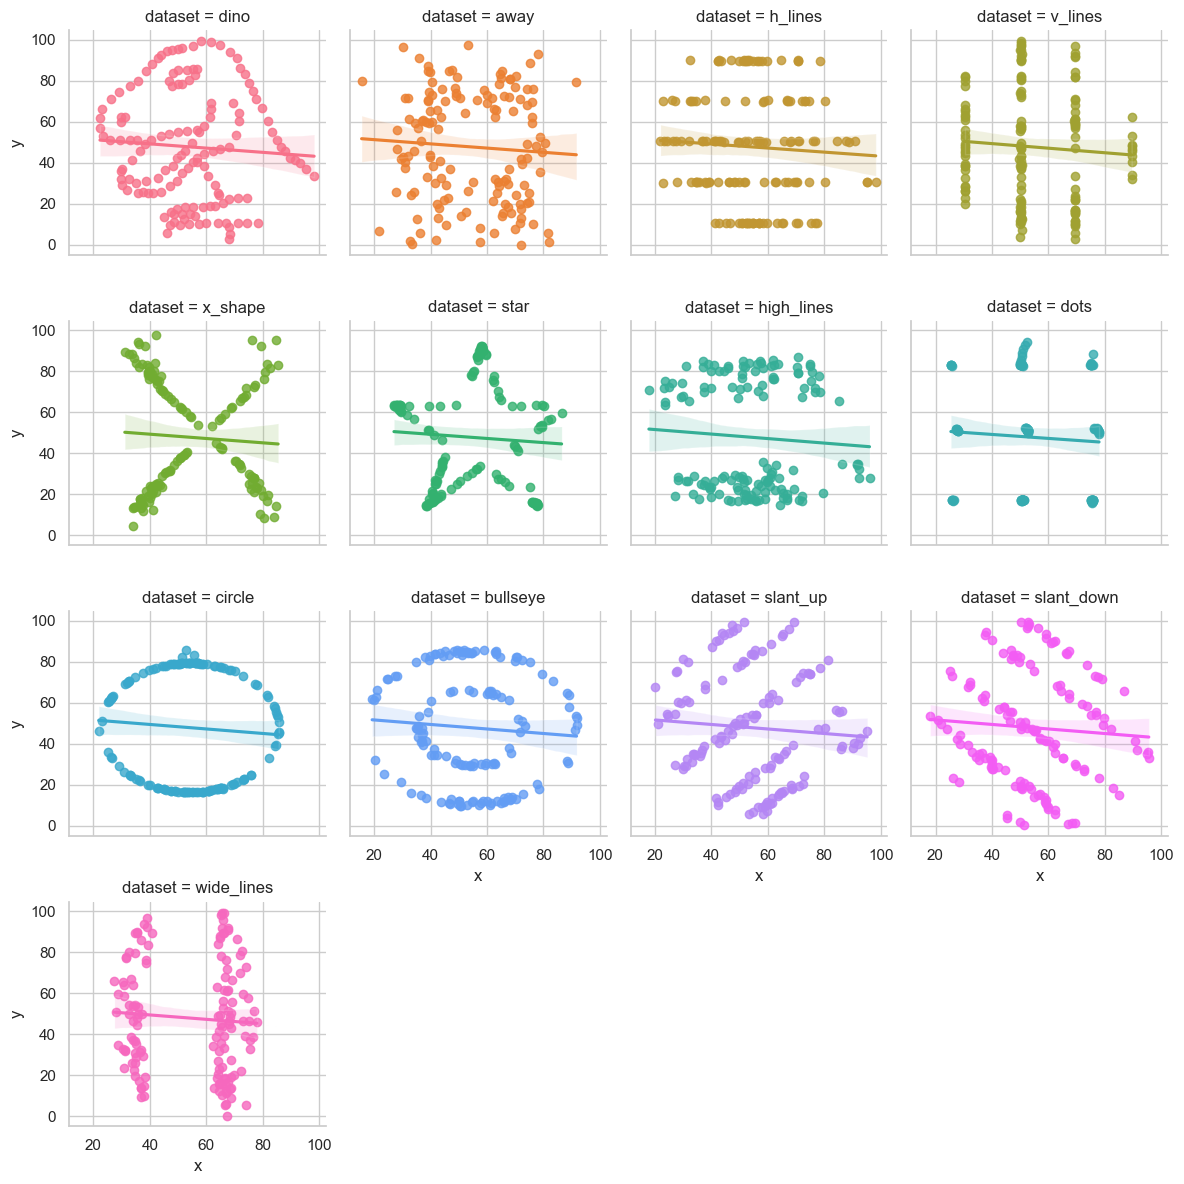

In [74]:
sns.lmplot(data=data, x="x", y="y", col="dataset", hue="dataset", col_wrap=4, height=3)


## Autodesk article https://www.research.autodesk.com/publications/same-stats-different-graphs/

## Housing prices

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [180]:
PATH = 'train.csv'
TARGET = 'SalePrice'

df_raw = pd.read_csv(PATH)

df_raw.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
838,839,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,144000
1236,1237,160,RL,36.0,2628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000


In [141]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [142]:
df_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [144]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

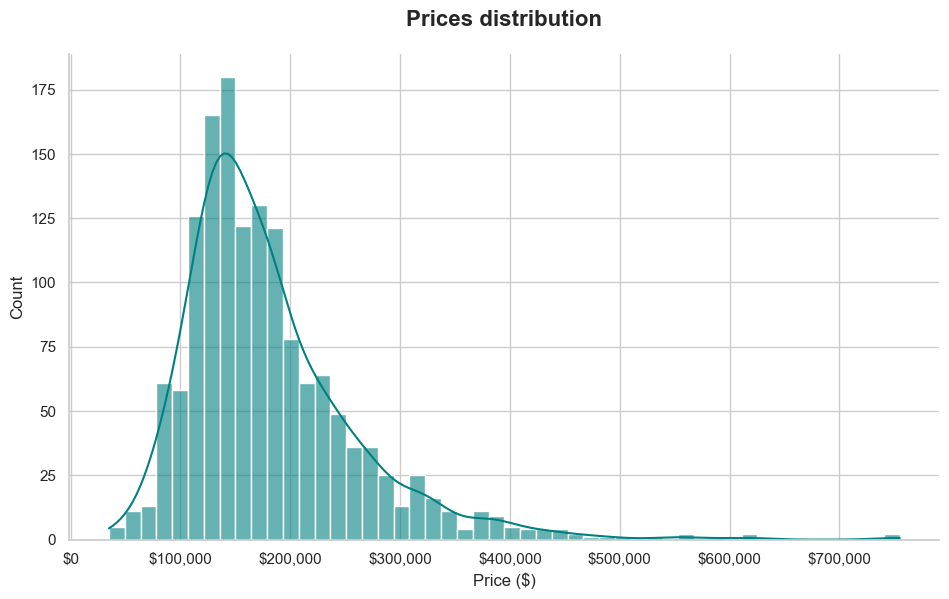

In [145]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df_raw, x='SalePrice', kde=True, color='teal', alpha=0.6, edgecolor=None, bins=50, stat='count')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_title('Prices distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price ($)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

sns.despine()

plt.show()

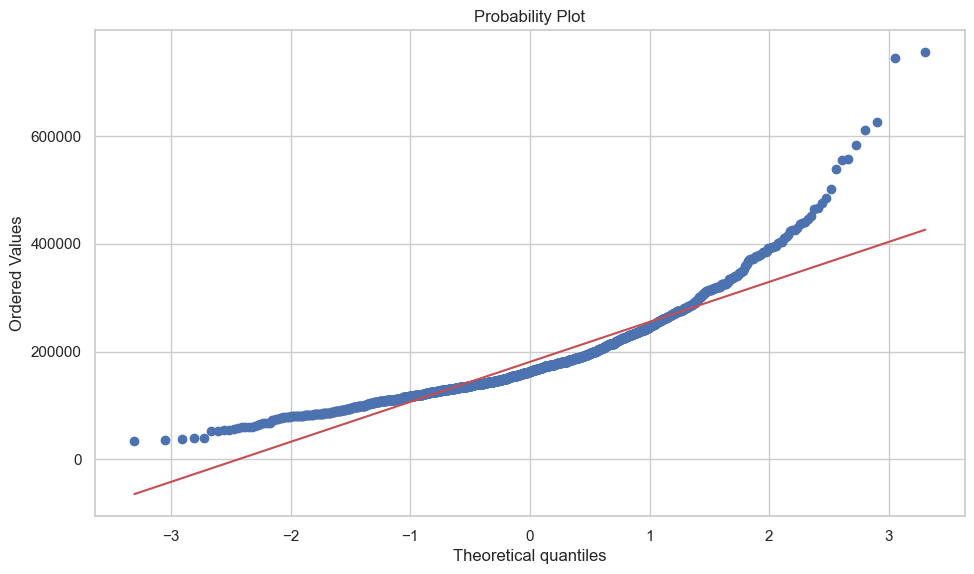

In [146]:
from scipy import stats

fig = plt.figure(figsize=(10, 6))
res = stats.probplot(df_raw['SalePrice'], plot=plt)
plt.show()

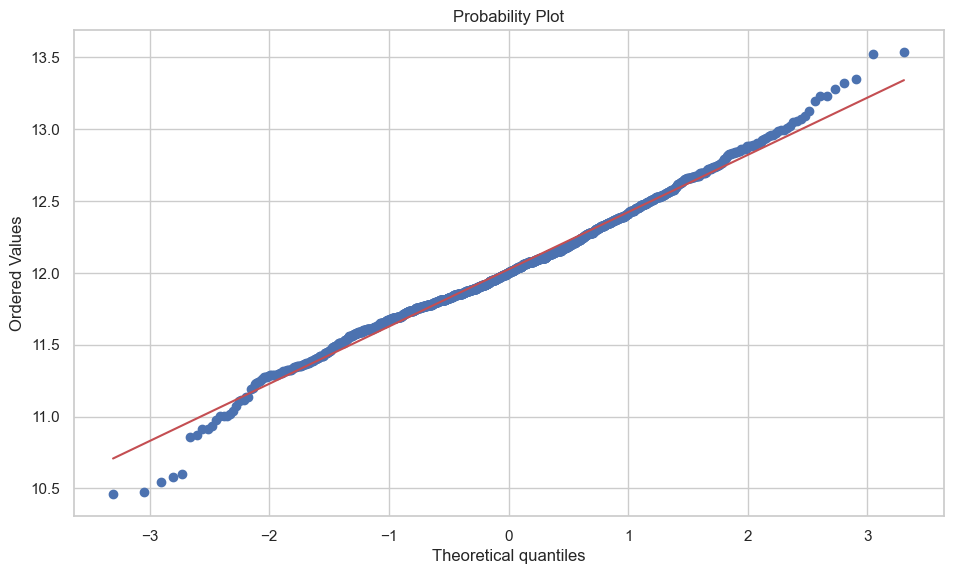

In [181]:
df_raw['PriceLog']=np.log1p(df_raw['SalePrice']) 

fig = plt.figure(figsize=(10, 6))
res = stats.probplot(df_raw['PriceLog'], plot=plt)
plt.show()

In [150]:
df_raw[['SalePrice','PriceLog']].agg(['skew','kurt'])

,SalePrice,PriceLog
skew,1.882876,0.121347
kurt,6.536282,0.809519


## Univariate analysis

### Numerical features

In [184]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: xlabel='GrLivArea', ylabel='Count'>

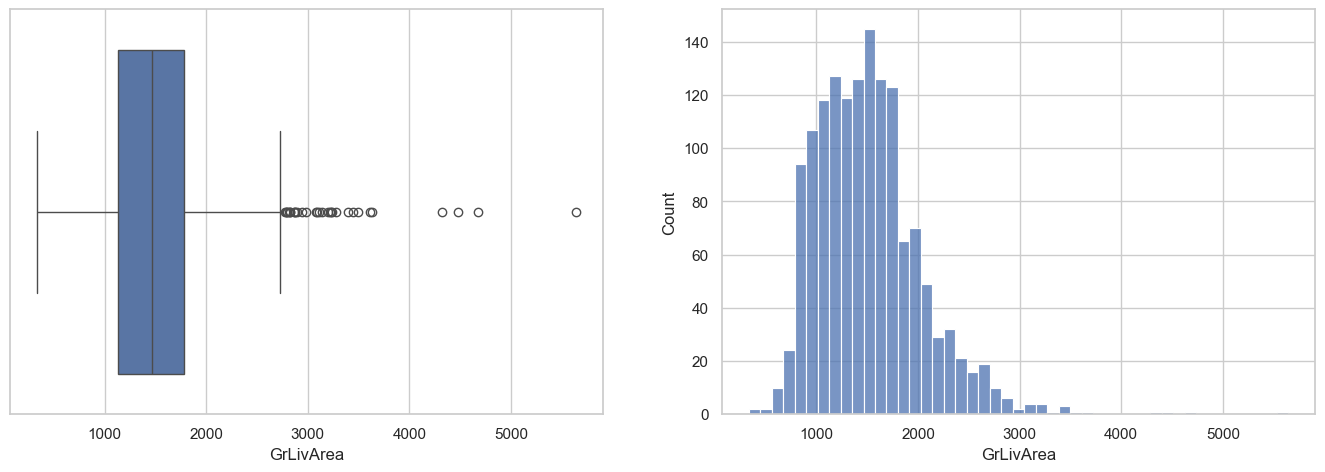

In [185]:
FEATURE = 'GrLivArea'

fig, axes=plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.boxplot(data=df_raw,x=FEATURE,ax=axes[0])
sns.histplot(data=df_raw, x=FEATURE, ax=axes[1])

In [186]:
import plotly.express as px

fig = px.histogram(
    df_raw,
    x=FEATURE,
    nbins=60,
    marginal="box",
    histnorm='density',
    title=f"{FEATURE}: distribution"
)
fig.update_layout(height=600, width=800)
fig.show()

In [136]:
df_raw

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414348
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375127
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375127


### Categorical features

In [194]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [199]:
px.histogram(df_raw, x='OverallCond', text_auto=True, color='OverallCond',
             title='Distribution of OverallCond')

In [208]:
col = "Neighborhood"

d = df_raw[col].fillna("NA").astype("object")
vc = d.value_counts()

top = 20
if len(vc) > top:
    head = vc.iloc[:top]
    other = pd.Series({"Other": vc.iloc[top:].sum()})
    vc = pd.concat([head, other])

plot_df = vc.rename_axis(col).reset_index(name="count")

fig = px.bar(plot_df, x=col, y="count", title=f"Top {top} {col} values by count")
fig.update_layout(margin=dict(l=10, r=10, t=30, b=10))
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [211]:
col = "OverallQual"
order = list(range(1, 11))
d = df_raw[col].dropna().astype(int)

plot_df = d.value_counts().reindex(order, fill_value=0).rename_axis(col).reset_index(name="count")

fig = px.bar(plot_df, x=col, y="count", title=f"Distribution of {col}")
fig.update_layout(margin=dict(l=10, r=10, t=30, b=10))
fig.show()

In [217]:
col = "SalePrice"
d = df_raw[col].dropna()

fig = px.histogram(d, x=col, nbins=90, marginal="rug", histnorm='density', title=f"Distribution of {col}")
fig.update_layout(margin=dict(l=10, r=10, t=30, b=10))
fig.show()

## Time series

In [262]:
d = df_raw[["YrSold", "MoSold", "SalePrice"]].dropna().copy()
d["date"] = pd.to_datetime(dict(year=d["YrSold"].astype(int), month=d["MoSold"].astype(int), day=1))

ts = (
    d.groupby("date", as_index=False)["SalePrice"]
     .median()
     .sort_values("date")
)

fig = px.line(
    ts,
    x="date",
    y="SalePrice",
    template="plotly_white",
    title="Median SalePrice over time (monthly)"
)
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10), title_x=0.5)
fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Median SalePrice", tickprefix="$", tickformat=",.0f")
fig.show()

In [270]:
import pandas as pd
import plotly.graph_objects as go

d = df_raw[["YrSold", "MoSold", "SalePrice"]].dropna().copy()
d["date"] = pd.to_datetime(dict(year=d["YrSold"].astype(int), month=d["MoSold"].astype(int), day=1))

g = d.groupby("date")["SalePrice"]
ts = pd.DataFrame({
    "mean": g.mean(),
    "median": g.median(),
    "p10": g.quantile(0.10),
    "p25": g.quantile(0.25),
    "p75": g.quantile(0.75),
    "p90": g.quantile(0.90),
}).reset_index().sort_values("date")

fig = go.Figure()

fig.add_trace(go.Scatter(x=ts["date"], y=ts["mean"], mode="lines", name="Mean"))
fig.add_trace(go.Scatter(x=ts["date"], y=ts["median"], mode="lines", name="Median"))

fig.add_trace(go.Scatter(x=ts["date"], y=ts["p10"], mode="lines", name="P10", line=dict(dash="dot")))
fig.add_trace(go.Scatter(x=ts["date"], y=ts["p25"], mode="lines", name="P25", line=dict(dash="dot")))
fig.add_trace(go.Scatter(x=ts["date"], y=ts["p75"], mode="lines", name="P75", line=dict(dash="dot")))
fig.add_trace(go.Scatter(x=ts["date"], y=ts["p90"], mode="lines", name="P90", line=dict(dash="dot")))

fig.update_layout(
    template="plotly_white",
    title="SalePrice over time: mean, median, percentiles (monthly)",
    title_x=0.5,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10),
)

fig.update_xaxes(title_text="Month")
fig.update_yaxes(
    title_text="SalePrice",
    tickprefix="$",
    tickformat=",.0f",
    rangemode="tozero"
)

fig.show()

## Multivariate

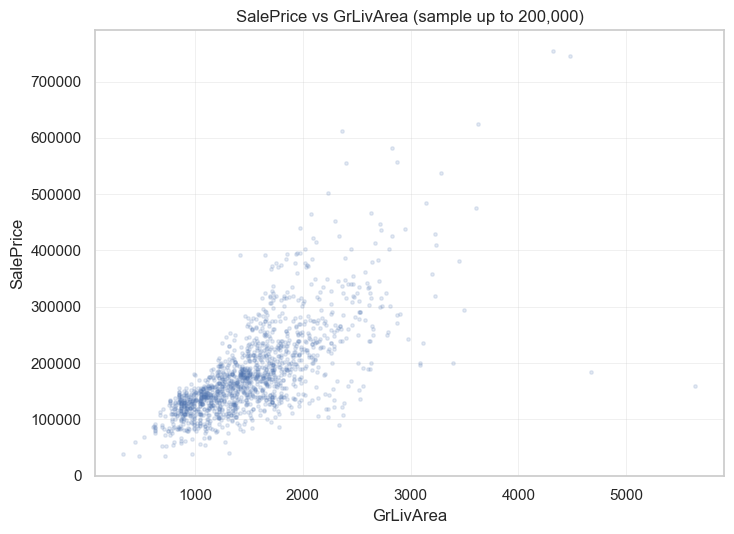

In [ ]:
x, y = "GrLivArea", "SalePrice"

d = df_raw[[x, y]].dropna()
sample = 200_000
if len(d) > sample:
    d = d.sample(sample, random_state=0)

fig, ax = plt.subplots(figsize=(7.5, 5.5))
ax.scatter(d[x].to_numpy(), d[y].to_numpy(), s=6, alpha=0.15, rasterized=True)
ax.set_title(f"{y} vs {x} (sample up to {sample:,})")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.grid(True, linewidth=0.5, alpha=0.4)
fig.tight_layout()
plt.show()


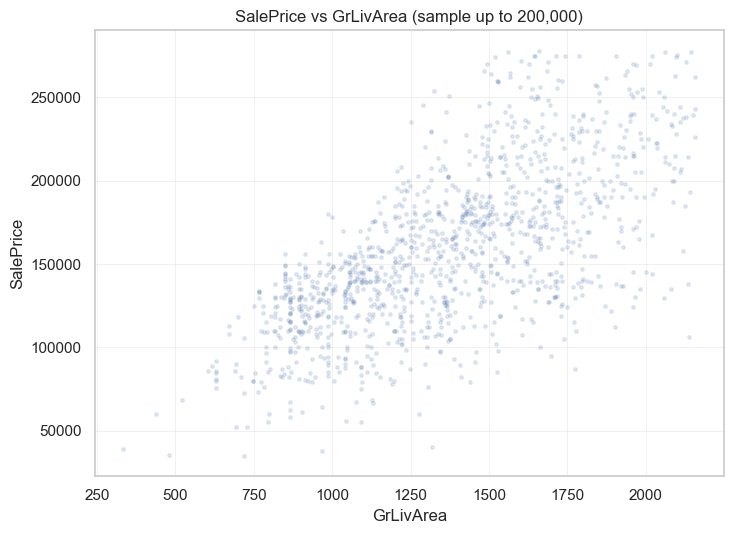

In [229]:
x, y = "GrLivArea", "SalePrice"

d = df_raw[[x, y]].dropna()
sample = 200_000
if len(d) > sample:
    d = d.sample(sample, random_state=0)

d_x_95q = np.quantile(d[x], 0.9)
d_y_95q = np.quantile(d[y], 0.9)
d = d[(d[x] <= d_x_95q) & (d[y] <= d_y_95q)]

fig, ax = plt.subplots(figsize=(7.5, 5.5))
ax.scatter(d[x].to_numpy(), d[y].to_numpy(), s=6, alpha=0.15, rasterized=True)
ax.set_title(f"{y} vs {x} (sample up to {sample:,})")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.grid(True, linewidth=0.5, alpha=0.4)
fig.tight_layout()
plt.show()


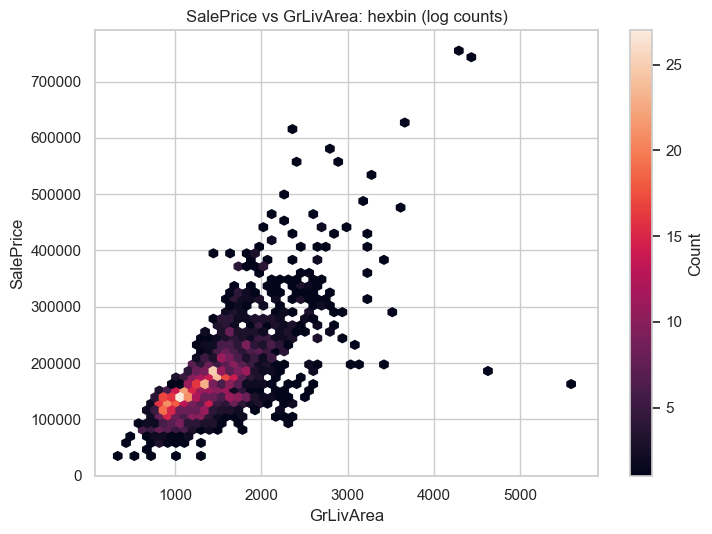

In [232]:
x, y = "GrLivArea", "SalePrice"

d = df_raw[[x, y]].dropna()

fig, ax = plt.subplots(figsize=(7.5, 5.5))
hb = ax.hexbin(d[x].to_numpy(), d[y].to_numpy(), gridsize=55, mincnt=1)
ax.set_title(f"{y} vs {x}: hexbin (log counts)")
ax.set_xlabel(x)
ax.set_ylabel(y)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Count")
fig.tight_layout()
plt.show()

In [240]:
import numpy as np
import plotly.graph_objects as go

x, y = "GrLivArea", "SalePrice"
d = df_raw[[x, y]].dropna()

d = d[(d[x] <= d[x].quantile(0.995)) & (d[y] <= d[y].quantile(0.995))]

xbins = 55
ybins = 55

x_edges = np.linspace(d[x].min(), d[x].max(), xbins + 1)
y_edges = np.linspace(d[y].min(), d[y].max(), ybins + 1)

H, x_e, y_e = np.histogram2d(d[x].to_numpy(), d[y].to_numpy(), bins=[x_edges, y_edges])

x_centers = (x_e[:-1] + x_e[1:]) / 2
y_centers = (y_e[:-1] + y_e[1:]) / 2
Xc, Yc = np.meshgrid(x_centers, y_centers, indexing="xy")
Z = H.T

fig = go.Figure(
    data=go.Surface(
        x=Xc,
        y=Yc,
        z=np.log10(Z + 1),
        showscale=True,
        colorbar=dict(title="log10(count+1)")
    )
)

fig.update_layout(
    template="plotly_white",
    title=f"{y} vs {x}: 3D binned density surface",
    title_x=0.5,
    margin=dict(l=10, r=10, t=50, b=10),
    scene=dict(
        xaxis_title=x,
        yaxis_title=y,
        zaxis_title="log10(count+1)"
    )
)

fig.show()


In [242]:
cat, num = "Neighborhood", "SalePrice"

d = df_raw[[cat, num]].dropna()
top = 15
keep = d[cat].value_counts().index[:top]
d = d[d[cat].isin(keep)]

fig = px.box(
    d, x=cat, y=num, points=False,
    title=f"{num} by {cat} (top {top} categories)"
    
)
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10), title_x=0.5)
#fig.update_xaxes(categoryorder="total descending", title_text=cat)
fig.update_yaxes(title_text=num)
fig.show()

In [245]:
cat, num = "Neighborhood", "SalePrice"

d = df_raw[[cat, num]].dropna()
top = 15
keep = d[cat].value_counts().index[:top]
d = d[d[cat].isin(keep)].copy()

# order by median SalePrice
med = d.groupby(cat)[num].median().sort_values(ascending=True)
order = med.index.tolist()

fig = px.box(
    d, x=cat, y=num, points=False,
    category_orders={cat: order},
    title=f"{num} by {cat} (top {top} categories, ordered by median)"
)
fig.update_layout(template="plotly_white", margin=dict(l=10, r=10, t=50, b=10), title_x=0.5)
fig.update_xaxes(title_text=cat)
fig.update_yaxes(title_text=num)
fig.show()

In [256]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [261]:
x = "GrLivArea"
y = "OverallQual"
price = "SalePrice"

d = df_raw[[x, y, price]].dropna().copy()

xbins = 12
ybins = 3

d["_xq"] = pd.qcut(d[x], q=xbins, duplicates="drop").astype(str)
d["_yq"] = pd.qcut(d[y], q=ybins, duplicates="drop").astype(str)

pt = pd.pivot_table(
    d,
    index="_yq",
    columns="_xq",
    values=price,
    aggfunc="median"
).sort_index()

def fmt_money_short(v):
    if pd.isna(v):
        return ""
    v = float(v)
    if abs(v) >= 1_000_000:
        return f"${v/1_000_000:.1f}M".replace(".0M", "M")
    if abs(v) >= 1_000:
        return f"${v/1_000:.0f}k"
    return f"${v:.0f}"

text = pt.applymap(fmt_money_short)

fig = px.imshow(
    pt,
    aspect="auto",
    template="plotly_white",
    color_continuous_scale="RdYlGn",
    title=f"Median {price} by quantile bins of {y} (rows) and {x} (cols)"
)

fig.update_traces(text=text.values, texttemplate="%{text}", hovertemplate="Median: %{z:$,.0f}<extra></extra>")
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10), title_x=0.5)
fig.update_xaxes(title_text=f"{x} (quantile bins)")
fig.update_yaxes(title_text=f"{y} (quantile bins)")
fig.show()

/var/folders/79/_6n38xtd66g3cm28hq74f0300000gp/T/ipykernel_83873/2213853861.py:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [281]:
df_raw.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceLog
174,175,20,RL,47.0,12416,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2008,WD,Normal,184000,12.122696
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,New,Partial,465000,13.049795
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,129000,11.767575
1040,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000,11.951187
1157,1158,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,230000,12.345839


In [ ]:
x = "GrLivArea"
y = "OverallQual"
price = "SalePrice"

d = df_raw[[x, y, price]].dropna().copy()

xbins = 12
ybins = 3

d["_xq"] = pd.qcut(d[x], q=xbins, duplicates="drop").astype(str)
d["_yq"] = pd.qcut(d[y], q=ybins, duplicates="drop").astype(str)

pt = pd.pivot_table(
    d,
    index="_yq",
    columns="_xq",
    values=price,
    aggfunc="median"
).sort_index()

def fmt_money_short(v):
    if pd.isna(v):
        return ""
    v = float(v)
    if abs(v) >= 1_000_000:
        return f"${v/1_000_000:.1f}M".replace(".0M", "M")
    if abs(v) >= 1_000:
        return f"${v/1_000:.0f}k"
    return f"${v:.0f}"

text = pt.applymap(fmt_money_short)

fig = px.imshow(
    pt,
    aspect="auto",
    template="plotly_white",
    color_continuous_scale="RdYlGn",
    title=f"Median {price} by quantile bins of {y} (rows) and {x} (cols)"
)

fig.update_traces(text=text.values, texttemplate="%{text}", hovertemplate="Median: %{z:$,.0f}<extra></extra>")
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10), title_x=0.5)
fig.update_xaxes(title_text=f"{x} (quantile bins)")
fig.update_yaxes(title_text=f"{y} (quantile bins)")
fig.show()

## Correlation

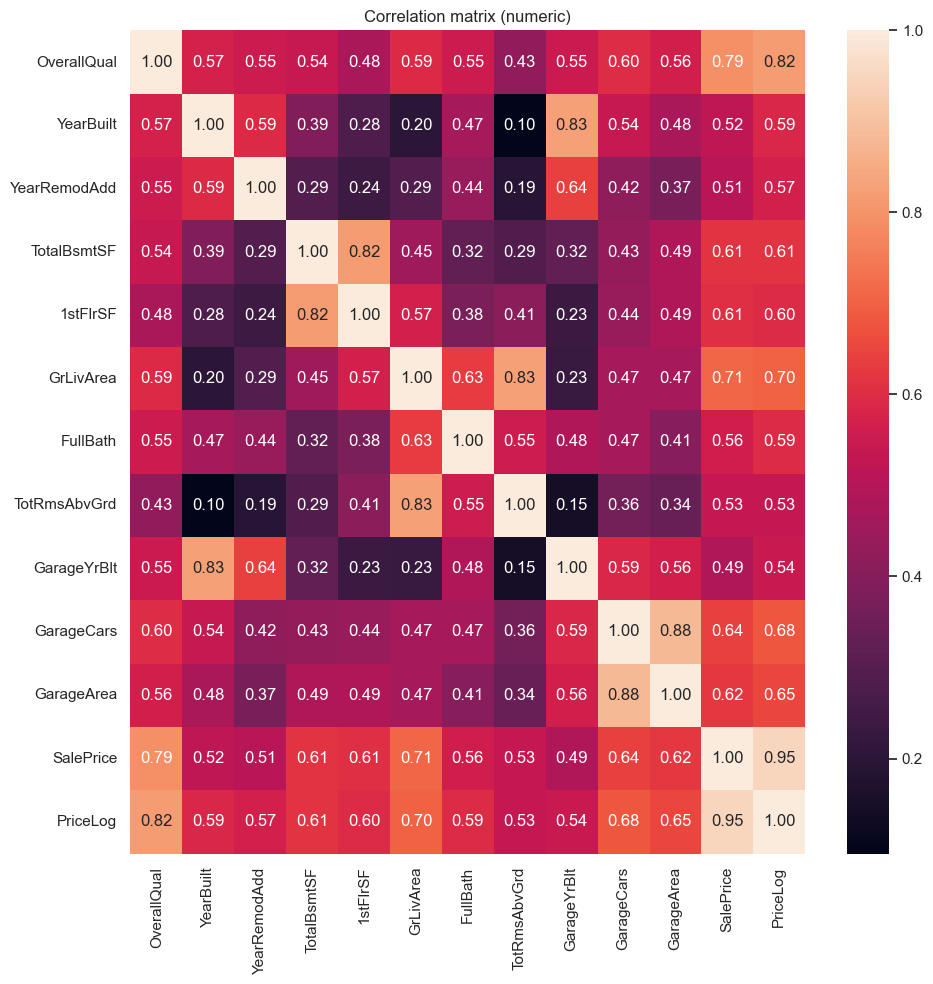

In [283]:
nums = df_raw.select_dtypes(include=[np.number]).columns.tolist()

corr_columns = df_raw[nums].corr()['PriceLog'][df_raw[nums].corr()['PriceLog'].abs() > 0.5].index.to_list()

# corr_columns.remove('price_log')
# corr_columns.remove('SalePrice')


if len(nums) >= 2:
    corr = df_raw[corr_columns].corr()

    #corr = corr.mask(np.triu(np.ones(corr.shape)).astype(bool))

    plt.figure(figsize=(10, 10)) # Increased size slightly for text visibility
    sns.heatmap(corr, annot=True, fmt=".2f",
                xticklabels=corr_columns, yticklabels=corr_columns)
    
    plt.title("Correlation matrix (numeric)")
    plt.tight_layout()
    plt.show()

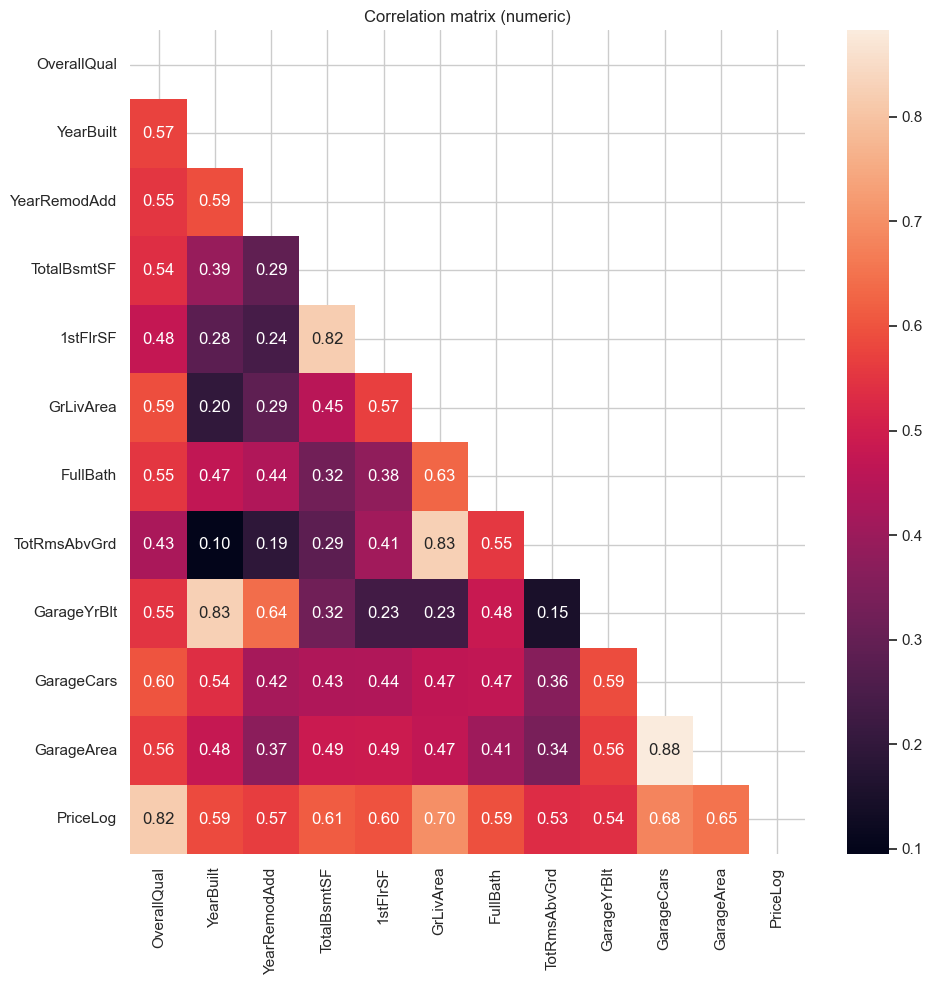

In [174]:
nums = df_raw.select_dtypes(include=[np.number]).columns.tolist()

corr_columns = df_raw[nums].corr()['PriceLog'][df_raw[nums].corr()['PriceLog'].abs() > 0.5].index.to_list()

corr_columns.remove('price_log')
corr_columns.remove('SalePrice')


if len(nums) >= 2:
    corr = df_raw[corr_columns].corr()

    corr = corr.mask(np.triu(np.ones(corr.shape)).astype(bool))

    plt.figure(figsize=(10, 10)) # Increased size slightly for text visibility
    sns.heatmap(corr, annot=True, fmt=".2f",
                xticklabels=corr_columns, yticklabels=corr_columns)
    
    plt.title("Correlation matrix (numeric)")
    plt.tight_layout()
    plt.show()

In [175]:
df_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,price_log,PriceLog
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,12.072547,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,12.254868,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,12.493133,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,11.864469,11.864469


In [284]:
df_raw.corr?

Signature:
df_raw.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versionadd

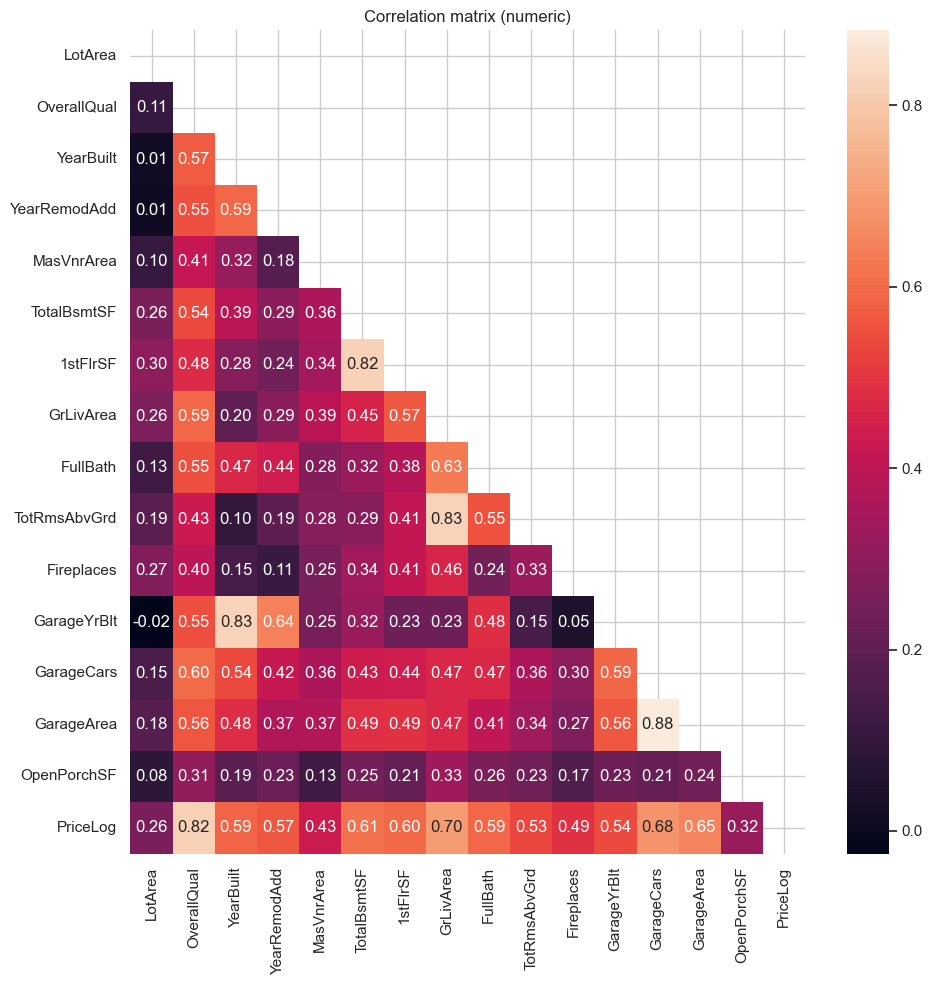

In [179]:
nums = df_raw.select_dtypes(include=[np.number]).columns.tolist()

corr_columns = df_raw[nums].corr()['PriceLog'][df_raw[nums].corr(method='kendall')['PriceLog'].abs() > 0.3].index.to_list()

corr_columns.remove('price_log')
corr_columns.remove('SalePrice')


if len(nums) >= 2:
    corr = df_raw[corr_columns].corr()

    corr = corr.mask(np.triu(np.ones(corr.shape)).astype(bool))

    plt.figure(figsize=(10, 10)) # Increased size slightly for text visibility
    sns.heatmap(corr, annot=True, fmt=".2f",
                xticklabels=corr_columns, yticklabels=corr_columns)
    
    plt.title("Correlation matrix (numeric)")
    plt.tight_layout()
    plt.show()

## Simpson's paradox

The first plot shows the **overall relationship** between `GrLivArea` and `SalePrice` when we ignore `Neighborhood`.  
In the second plot we split the data by `Neighborhood` and fit a separate trend within each group.

What this demonstrates:

- `Neighborhood` acts like a **hidden (confounding) variable**.
- It influences **both**:
  - the typical `GrLivArea` (some neighborhoods tend to have smaller/larger homes),
  - and the baseline `SalePrice` (some neighborhoods are simply more expensive).
- When neighborhoods are mixed together, the **aggregate trend** can look very different from the **within-neighborhood trend**.

EDA takeaway: whenever a global pattern looks surprising, check whether it is driven by **group composition** (e.g., `Neighborhood`, `OverallQual`, `YearBuilt`) rather than a direct relationship between the two variables.


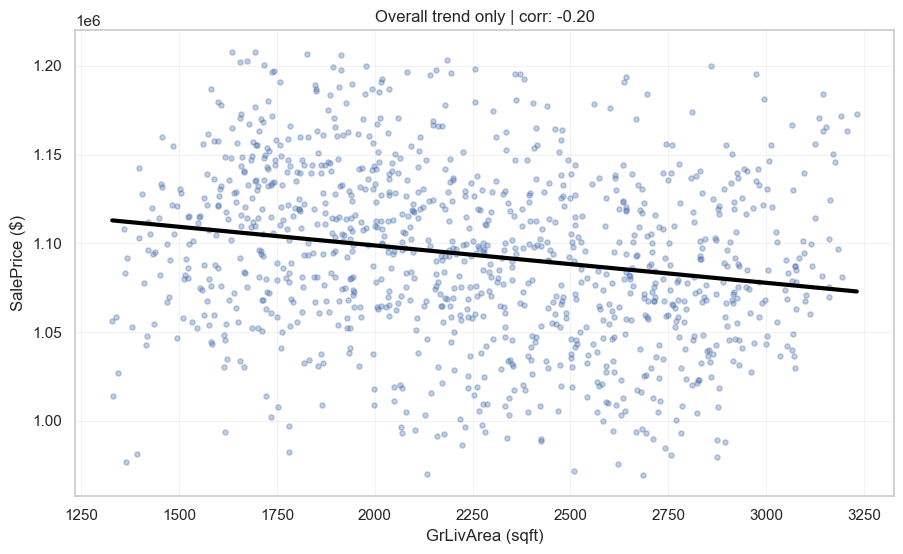

/var/folders/79/_6n38xtd66g3cm28hq74f0300000gp/T/ipykernel_83873/2698131211.py:50: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



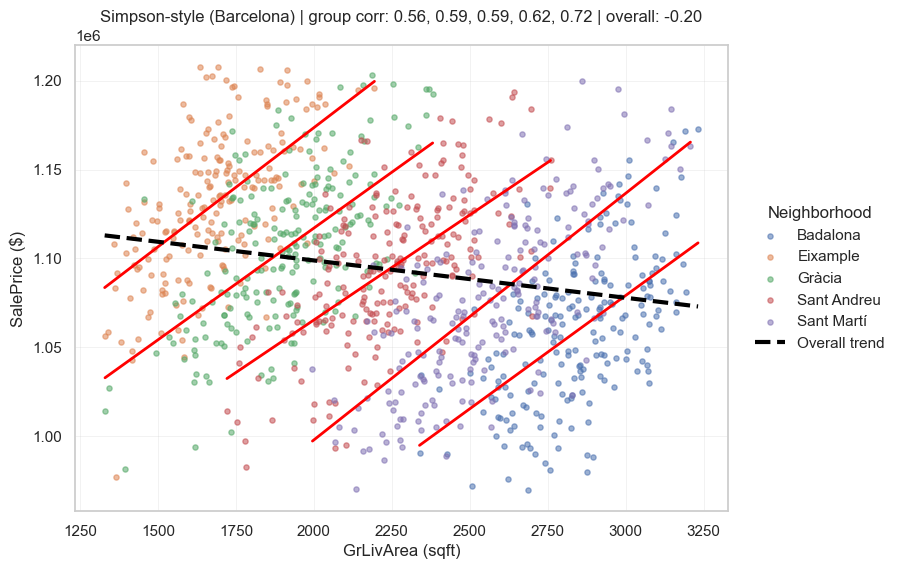

In [280]:
rng = np.random.default_rng(7)

# Barcelona districts (as "Neighborhood")
neighborhoods = ["Eixample", "Gràcia", "Sant Andreu", "Sant Martí", "Badalona"]
G = len(neighborhoods)
n_per = 220

# milder separation (overlap) + Simpson-style setup
mu_area = np.array([1700, 1950, 2250, 2550, 2850])
base_price = np.array([900_000, 840_000, 780_000, 720_000, 660_000])

slope_within = 140
area_sd = 220
noise_sd = 35_000

rows = []
for i, nb in enumerate(neighborhoods):
    x = rng.normal(mu_area[i], area_sd, size=n_per)
    y = base_price[i] + slope_within * x + rng.normal(0, noise_sd, size=n_per)
    rows.append(pd.DataFrame({"Neighborhood": nb, "GrLivArea": x, "SalePrice": y}))

df_simpson = pd.concat(rows, ignore_index=True)

# trim for nicer view
df_simpson = df_simpson[
    (df_simpson["GrLivArea"].between(df_simpson["GrLivArea"].quantile(0.01), df_simpson["GrLivArea"].quantile(0.99))) &
    (df_simpson["SalePrice"].between(df_simpson["SalePrice"].quantile(0.01), df_simpson["SalePrice"].quantile(0.99)))
].copy()

xcol, ycol = "GrLivArea", "SalePrice"

# ---- 1) overall trend only ----
corr_all = float(df_simpson[xcol].corr(df_simpson[ycol]))

fig, ax = plt.subplots(figsize=(9.2, 5.7))
ax.scatter(df_simpson[xcol], df_simpson[ycol], s=14, alpha=0.35, rasterized=True)

m_all, c_all = np.polyfit(df_simpson[xcol], df_simpson[ycol], 1)
xs = np.linspace(df_simpson[xcol].min(), df_simpson[xcol].max(), 200)
ax.plot(xs, m_all * xs + c_all, color="black", lw=3)

ax.set_title(f"Overall trend only | corr: {corr_all:.2f}")
ax.set_xlabel("GrLivArea (sqft)")
ax.set_ylabel("SalePrice ($)")
ax.grid(True, linewidth=0.5, alpha=0.35)
fig.tight_layout()
plt.show()

# ---- 2) colored neighborhoods + within lines + overall dashed + legend ----
corrs = df_simpson.groupby("Neighborhood").apply(lambda d: d[xcol].corr(d[ycol])).round(2).tolist()

fig, ax = plt.subplots(figsize=(9.2, 5.7))
for nb, d in df_simpson.groupby("Neighborhood"):
    ax.scatter(d[xcol], d[ycol], s=14, alpha=0.55, rasterized=True, label=nb)
    m, c = np.polyfit(d[xcol], d[ycol], 1)
    xs_g = np.linspace(d[xcol].min(), d[xcol].max(), 40)
    ax.plot(xs_g, m * xs_g + c, color="red", lw=2)

ax.plot(xs, m_all * xs + c_all, color="black", lw=3, linestyle="--", label="Overall trend")

ax.set_title(f"Simpson-style (Barcelona) | group corr: {', '.join(map(str, corrs))} | overall: {corr_all:.2f}")
ax.set_xlabel("GrLivArea (sqft)")
ax.set_ylabel("SalePrice ($)")
ax.grid(True, linewidth=0.5, alpha=0.35)

ax.legend(
    title="Neighborhood",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

fig.tight_layout()
plt.show()


https://en.wikipedia.org/wiki/Simpson%27s_paradox

## More about data manipulations 

https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

## HW discussion

https://github.com/TimVilkov/HARBOUR_SDA_2026/tree/main/HW1

In [61]:
df_hw = pd.read_csv('dataset_HW1.csv')
df_hw.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
291327,C0B54720A5A48314,classic_bike,2023-06-26 14:36:09,2023-06-26 15:11:36,Sheridan Rd & Irving Park Rd,13063,Sheridan Rd & Buena Ave,TA1309000027,41.954245,-87.654406,41.958494,-87.654966,member,2023-06
187052,565B2437184C754D,electric_bike,2023-10-16 08:49:06,2023-10-16 09:00:33,Elizabeth St & Fulton St,13197,New St & Illinois St,TA1306000013,41.886657,-87.659658,41.890847,-87.618617,member,2023-10
267620,C1AB2C5C6D5D8357,classic_bike,2023-09-29 23:17:55,2023-09-29 23:21:42,Clark St & Wellington Ave,TA1307000136,Halsted St & Wrightwood Ave,TA1309000061,41.936497,-87.647539,41.929143,-87.649077,casual,2023-09
267291,06B45EBF573E4221,classic_bike,2023-06-16 12:41:08,2023-06-16 12:56:37,Indiana Ave & Roosevelt Rd,SL-005,Orleans St & Merchandise Mart Plaza,TA1305000022,41.867888,-87.623041,41.888243,-87.636390,member,2023-06
56546,365976B0FD2A0C84,electric_bike,2023-09-22 15:19:26,2023-09-22 15:29:05,Damen Ave & Melrose Ave,13143,NaN,NaN,41.940523,-87.678645,41.950000,-87.660000,casual,2023-09
